Import necessary libraries

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.datasets import mnist

Load the MNIST dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset (scale pixel values to [0,1] range)
x_train, x_test = x_train / 255.0, x_test / 255.0

Define a simple neural network without Batch Normalization

In [12]:
def build_model_without_bn():
    """
    This function builds a simple fully connected neural network **without** batch normalization.
    """
    model = Sequential([
        tf.keras.layers.Input(shape=(28, 28)),  # Input layer
        Flatten(),  # Converts 28x28 image into a 1D vector
        Dense(256, activation='relu'),  # First hidden layer
        Dense(128, activation='relu'),  # Second hidden layer
        Dense(64, activation='relu'),  # Third hidden layer
        Dense(10, activation='softmax')  # Output layer (10 classes)
    ])
    return model

Define a neural network with Batch Normalization




    This function builds a neural network with Batch Normalization.

    Batch Normalization normalizes the activations using:

    Step 1: Compute mean and variance across the mini-batch:
        μ_B = (1/m) Σ x_i
        σ_B^2 = (1/m) Σ (x_i - μ_B)^2

    Step 2: Normalize each activation:
        x̂_i = (x_i - μ_B) / sqrt(σ_B^2 + ε)

    Step 3: Scale and shift using learnable parameters:
        y_i = γ * x̂_i + β
    
    γ (scale) and β (shift) are trainable parameters that allow
    the model to retain flexibility after normalization.
    

In [13]:
def build_model_with_bn():
    model = Sequential([
        tf.keras.layers.Input(shape=(28, 28)),  # Input layer
        Flatten(),  # Converts 28x28 image into a 1D vector

        Dense(256, activation='relu'),
        BatchNormalization(),  # Normalizes activations before passing to next layer

        Dense(128, activation='relu'),
        BatchNormalization(),  # Again normalizing activations

        Dense(64, activation='relu'),
        BatchNormalization(),

        Dense(10, activation='softmax')  # Output layer
    ])
    return model

Compile and train both models

In [14]:
def train_and_evaluate(model, name):
    """
    This function compiles, trains, and evaluates a given model.
    The models are trained using Adam optimizer and sparse categorical crossentropy loss.
    """
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining model: {name}")
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    return history

# Train both models
model_without_bn = build_model_without_bn()
history_without_bn = train_and_evaluate(model_without_bn, "Without Batch Norm")

model_with_bn = build_model_with_bn()
history_with_bn = train_and_evaluate(model_with_bn, "With Batch Norm")


Training model: Without Batch Norm
Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9377 - loss: 0.2099 - val_accuracy: 0.9675 - val_loss: 0.1078
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9714 - loss: 0.0927 - val_accuracy: 0.9720 - val_loss: 0.0852
Epoch 3/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9805 - loss: 0.0636 - val_accuracy: 0.9694 - val_loss: 0.0978
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9841 - loss: 0.0487 - val_accuracy: 0.9750 - val_loss: 0.0901
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9865 - loss: 0.0402 - val_accuracy: 0.9699 - val_loss: 0.1078
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9786 - val_loss: 0.0817
Epoch 7/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9785 - val_loss: 0.0814
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9743 - val_loss: 0.1081
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9931 - 

Plot the accuracy comparison

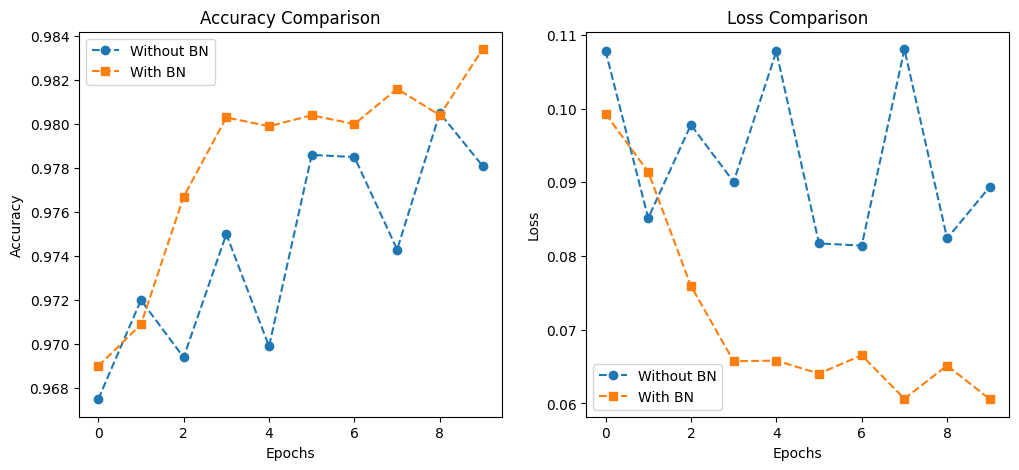

In [17]:
def plot_results(history_without_bn, history_with_bn):
    """
    This function plots training results for both models,
    comparing accuracy and loss over 10 epochs.
    """
    plt.figure(figsize=(12, 5))

    # Plot Accuracy Comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_without_bn.history['val_accuracy'], label='Without BN', linestyle='dashed', marker='o')
    plt.plot(history_with_bn.history['val_accuracy'], label='With BN', linestyle='dashed', marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison")
    plt.legend()

    # Plot Loss Comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_without_bn.history['val_loss'], label='Without BN', linestyle='dashed', marker='o')
    plt.plot(history_with_bn.history['val_loss'], label='With BN', linestyle='dashed', marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Comparison")
    plt.legend()

    plt.show()

# Plot comparison results
plot_results(history_without_bn, history_with_bn)

Conclusion:

    Batch Normalization stabilizes training, speeds up convergence, and often improves accuracy.